<center> <h2 style="background-color:#03c2fc;color:white;border-radius: 6px; padding:12px;"> Assignment 1 </center>

### Function to generate Data Matrix X

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
def generate_matrix(nsamples, dimension):
    X = np.random.random((nsamples, dimension))
    return X

In [2]:
generate_matrix(10, 3)
#we generated matrix with 3 independent features/variables.

array([[8.74414814e-04, 8.60884433e-01, 6.81651062e-01],
       [2.63273614e-02, 4.35444105e-01, 7.75346124e-01],
       [9.18758325e-01, 6.44178428e-01, 5.82585223e-01],
       [3.91925402e-01, 1.37690158e-01, 2.45475774e-01],
       [5.33856571e-01, 7.75346113e-01, 6.55822854e-01],
       [9.20466778e-02, 6.10549377e-01, 7.78694204e-01],
       [4.19155765e-01, 7.99417344e-01, 4.84067459e-01],
       [5.50463907e-01, 7.60221015e-01, 3.65976513e-01],
       [3.83679872e-02, 8.32209425e-01, 2.21910160e-01],
       [7.71615739e-01, 2.29258744e-01, 8.77197377e-02]])

In [3]:
def gen_dependent(X, w, bias, noise_var):
    t = np.matmul(X,w) + bias + np.random.normal(0, noise_var, len(X))
    return t
#generated dependent variable t, which is weighted combination of independent variable plus bias and noise/error having variance=noise_var

In [4]:
def linreg_estimate(X, w):
    y = np.matmul(X,w)
    return y
#predicted value of dependent variable t

In [5]:
import math
def mse_calc(y,t):
    variance = 0
    for i in range(len(y)):
        variance += (y[i] - t[i])**2
    mse = math.sqrt(variance)/len(y)
    return mse
#we calculate mean squared error from the standard formula.

In [6]:
def est_linreg(X, t , lamda):
    w = np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),t))
#     print(w)
    y = np.matmul(X,w)
#     print(y)
    mse = mse_calc(y, t)
    return w, mse, y
#we first estimated weights using normal equation of linear regression (X_transpose*X)^(-1)*(X_transpose*Y)
#we than predicted our dependent variable t using the estimated weight w and stored it in variable y.
# we than calculate mean squared error between true value and predicted value of dependent variable.

In [7]:
def gradient_mse(X,t,w):
    error = np.matmul(X,w) - t
    gradient = (np.dot(X.T, error))/len(X)
    return gradient

#  def _get_gradients(self, X, y, y_pred):
#         # get distance between y_pred and y_true
#         error = y_pred - y
#         # compute the gradients of weight & bias
#         dw = (1 / self.n_samples) * np.dot(X.T, error)
#         db = (1 / self.n_samples) * np.sum(error)
#         return dw, db

In [8]:
def L2_norm(w):
    return np.linalg.norm(w, ord=2, axis=None)
#L2_norm using numpy method

In [9]:
def gradient_L1norm(X, w):
    return np.matmul(X,w)

In [10]:
def update(X,t,w, eta, lambda1, lambda2):
    gradient = gradient_mse(X,t,w)
    w = w - eta*gradient
    mse_updated = mse_calc(np.matmul(X,w), t)
    return w, mse_updated
#we first calculate gradient between true value and predicted value of t than changed the weight accordingly and calculate updated mse.

In [44]:
def lin_reg_grad_descent(X,t,w,eta, max_iter, min_change_RMSE, lambda1=0, lambda2=0 ):
    for i in range(max_iter):
#         print("Updated weight:",w)
        mse = mse_calc(np.matmul(X,w), t)
        w, mse_updated = update(X,t,w,eta,lambda1, lambda2)
#         print(np.abs(mse - mse_updated))
        if (np.abs(mse - mse_updated) < min_change_RMSE):
            break
    return w
            
# implemented linear regression using gradient descent method where we made an initial guess of weight of
# independent variable than updated the weight based on gradients iteratively.
        
    

## Working of linear regression using pseudoinverse or normal equation method

In [45]:
X = generate_matrix(1000, 3)
w = [2,1,3]
bias = 0
var = 0.01
# noise = np.random.random(2)
t = gen_dependent(X, w, bias, var)


In [46]:
w, mse, y = est_linreg(X, t , 0)
print(w)

[1.99997055 1.00047573 2.99998914]


In [42]:
# Thus we see that the estimates are very close to original weight/coefficient

## Working of linear regression using gradient descent method

In [48]:
initial_weight = [0,0,0]
lin_reg_grad_descent(X,t,initial_weight,0.01, 10000, 0.0000001, lambda1=0, lambda2=0 )

array([1.99656197, 1.01924244, 2.98542849])

In [16]:
# Thus from gradient descent method as well we get the estimated coefficient of linear regression.

### Training RMSE using Pseudo inverse with no. of training samples

In [17]:
lst = []
x=[]
for i in range(10,1000,10):
    x.append(i)
    feature = 2
    X = generate_matrix(i, feature)
    w = np.random.random(feature)
    bias = 0
    var = 0.01
    # noise = np.random.random(2)
    t = gen_dependent(X, w, bias, var)
    w, mse, y = est_linreg(X, t , 0)
    lst.append(mse)

Text(0, 0.5, 'RMSE')

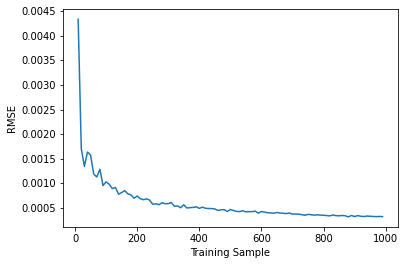

In [18]:
plt.plot(x,lst)
plt.xlabel("Training Sample")
plt.ylabel("RMSE")

In [ ]:
# as training sample increases the rmse decreases because model have more data to learn and it might overfit.

### Training RMSE using Pseudo inverse with no. of variables

In [19]:
lst = []
x=[]
for i in range(2,100,2):
    x.append(i)
    X = generate_matrix(100, i)
    w = np.random.random(i)
    bias = 0
    var = 0.01
    # noise = np.random.random(2)
    t = gen_dependent(X, w, bias, var)
    w, mse, y = est_linreg(X, t , 0)
    lst.append(mse)

Text(0, 0.5, 'RMSE')

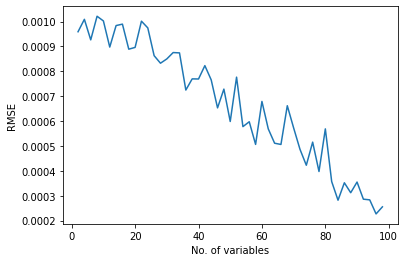

In [20]:
plt.plot(x,lst)
plt.xlabel("No. of variables")
plt.ylabel("RMSE")

### Training RMSE using Pseudo inverse with noise variance

In [21]:
lst = []
x=[]
for i in np.arange(0.01,5, 0.1):
    x.append(i)
    nsample = 1000
    nfeature = 4
    X = generate_matrix(nsample, nfeature )
    w = np.random.random(nfeature)
    bias = 0
    var = i
    # noise = np.random.random(2)
    t = gen_dependent(X, w, bias, var)
    w, mse, y = est_linreg(X, t , 0)
    lst.append(mse)

Text(0, 0.5, 'RMSE')

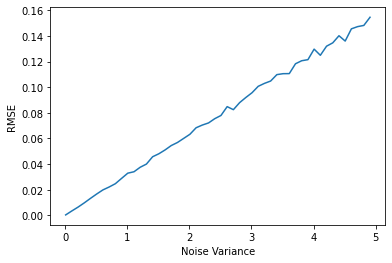

In [22]:
plt.plot(x,lst)
plt.xlabel("Noise Variance")
plt.ylabel("RMSE")

### Training RMSE using Pseudo inverse with Bias w0

In [23]:
lst = []
x=[]
for i in np.arange(0.001,2, 0.05):
    x.append(i)
    nsample = 1000
    nfeature = 4
    X = generate_matrix(nsample, nfeature )
    w = np.random.random(nfeature)
    bias = i
    var = 0.05
    # noise = np.random.random(2)
    t = gen_dependent(X, w, bias, var)
    w, mse, y = est_linreg(X, t , 0)
    lst.append(mse)

Text(0, 0.5, 'RMSE')

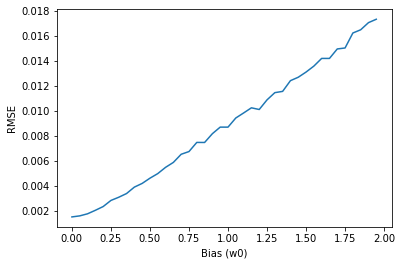

In [24]:
plt.plot(x,lst)
plt.xlabel("Bias (w0)")
plt.ylabel("RMSE")

### Time taken using Pseudo inverse with no. of training samples and no. of variables (breaking point)

Text(0, 0.5, 'Time taken (in milli sec)')

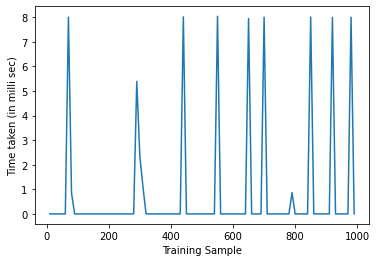

In [32]:
lst = []
x=[]
import time
for i in range(10,1000,10):
    x.append(i)
    feature = 2
    X = generate_matrix(i, feature)
    w = np.random.random(feature)
    bias = 0
    var = 0.01
    # noise = np.random.random(2)
    t = gen_dependent(X, w, bias, var)
    start = time.time()
    w, mse, y = est_linreg(X, t , 0)
    end = time.time()
    lst.append(1000*(end-start))
    
plt.plot(x,lst)
plt.xlabel("Training Sample")
plt.ylabel("Time taken (in milli sec)")

Text(0, 0.5, 'Time taken (in milli sec)')

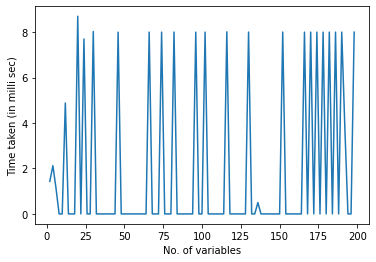

In [35]:
lst = []
x=[]
for i in range(2,200,2):
    x.append(i)
    X = generate_matrix(1000, i)
    w = np.random.random(i)
    bias = 0
    var = 0.01
    # noise = np.random.random(2)
    t = gen_dependent(X, w, bias, var)
    start = time.time()
    w, mse, y = est_linreg(X, t , 0)
    end = time.time()
    lst.append(1000*(end-start))
    
plt.plot(x,lst)
plt.xlabel("No. of variables")
plt.ylabel("Time taken (in milli sec)")

### Training RMSE using Pseudo inverse with no. of training samples (breaking point)

In [37]:
lst = []
x=[]
for i in range(100,1000000,10000):
    x.append(i)
    feature = 2
    X = generate_matrix(i, feature)
    w = np.random.random(feature)
    bias = 0
    var = 0.01
    # noise = np.random.random(2)
    t = gen_dependent(X, w, bias, var)
    w, mse, y = est_linreg(X, t , 0)
    lst.append(mse)

Text(0, 0.5, 'RMSE')

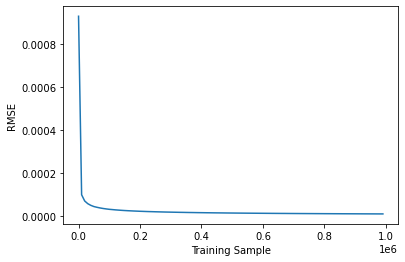

In [38]:
plt.plot(x,lst)
plt.xlabel("Training Sample")
plt.ylabel("RMSE")

### Training RMSE using Gradient Descent with no. of training samples

Text(0, 0.5, 'RMSE')

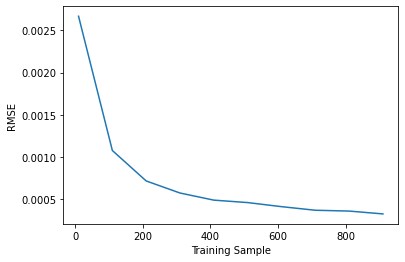

In [31]:
lst = []
x=[]
for i in range(10,1000,100):
    x.append(i)
    feature = 2
    X = generate_matrix(i, feature)
    w = np.random.random(feature)
    bias = 0
    var = 0.01
    # noise = np.random.random(2)
    t = gen_dependent(X, w, bias, var)
    w = lin_reg_grad_descent(X,t,np.zeros(len(w)) ,0.01, 10000, 0.0001, lambda1=0, lambda2=0 )
    mse = mse_calc(np.matmul(X,w),t)
    lst.append(mse)
    
plt.plot(x,lst)
plt.xlabel("Training Sample")
plt.ylabel("RMSE")

### Training RMSE using Gradient Descent with no. of features

In [32]:
lst = []
x=[]
for i in range(2,100,2):
    x.append(i)
    X = generate_matrix(100, i)
    w = np.random.random(i)
    bias = 0
    var = 0.01
    # noise = np.random.random(2)
    t = gen_dependent(X, w, bias, var)
    w = lin_reg_grad_descent(X,t,np.zeros(len(w)) ,0.01, 10000, 0.0001, lambda1=0, lambda2=0 )
    mse = mse_calc(np.matmul(X,w),t)
    lst.append(mse)

Text(0, 0.5, 'RMSE')

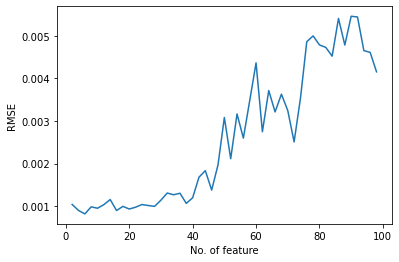

In [34]:
    
plt.plot(x,lst)
plt.xlabel("No. of feature")
plt.ylabel("RMSE")

### Time taken using Gradient descent with no. of training samples

Text(0, 0.5, 'Time taken using Gradient descent')

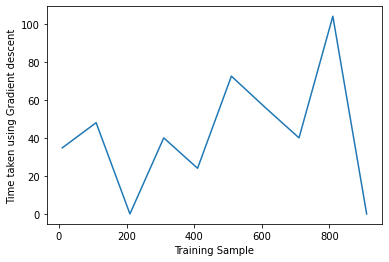

In [49]:
lst = []
x=[]
for i in range(10,1000,100):
    x.append(i)
    feature = 2
    X = generate_matrix(i, feature)
    w = np.random.random(feature)
    bias = 0
    var = 0.01
    # noise = np.random.random(2)
    t = gen_dependent(X, w, bias, var)
    start = time.time()
    w = lin_reg_grad_descent(X,t,np.zeros(len(w)) ,0.01, 10000, 0.0001, lambda1=0, lambda2=0 )
    end = time.time()
    lst.append(1000*(end-start))
    
plt.plot(x,lst)
plt.xlabel("Training Sample")
plt.ylabel("Time taken using Gradient descent")

### Time taken using Gradient descent with no. of features

Text(0, 0.5, 'Time taken using Gradient descent')

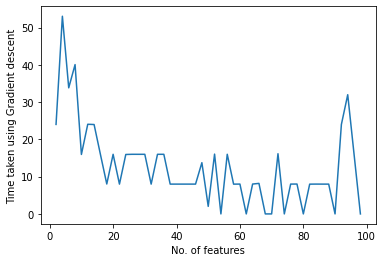

In [50]:
lst = []
x=[]
for i in range(2,100,2):
    x.append(i)
    X = generate_matrix(100, i)
    w = np.random.random(i)
    bias = 0
    var = 0.01
    # noise = np.random.random(2)
    t = gen_dependent(X, w, bias, var)
    start = time.time()
    w = lin_reg_grad_descent(X,t,np.zeros(len(w)) ,0.01, 10000, 0.0001, lambda1=0, lambda2=0 )
    end = time.time()
    lst.append(1000*(end-start))
    
plt.plot(x,lst)
plt.xlabel("No. of features")
plt.ylabel("Time taken using Gradient descent")

### Learning point

- Learned lot about methods of numpy such as matrix multiplication, Inverse, L2 norm
- Also got to know about Linear regression estimate in Normal form equation
- Solving for linear regression estimate iteratively using gradient descent
- Plot and see how the performance changes with change in data since it is very relevant in real life where we may have small or large data
- Also found out about time module to calculate the time taken by a code block to run